In [22]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib.colors import ListedColormap

torch.manual_seed(0)
np.random.seed(0)


In [23]:
positive_distribution = np.random.multivariate_normal([2.5,0], np.identity(2), size=750)
ones = torch.ones([750,1]);
negative_distribution = np.random.multivariate_normal([-2.5,0], np.identity(2), size = 750)
zeros = torch.zeros([750,1]);
X = np.append(positive_distribution, negative_distribution, 0)
Y = np.append(ones, zeros, 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=(1-5/6), random_state=73)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=(1-4/5), random_state=73)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape)

X_train = torch.DoubleTensor(X_train)
X_test = torch.DoubleTensor(X_test)
X_val = torch.DoubleTensor(X_val)

Y_train = torch.DoubleTensor(Y_train)
Y_test = torch.DoubleTensor(Y_test)
Y_val = torch.DoubleTensor(Y_val)



(1000, 2) (250, 2) (250, 2) (1000, 1)


Visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


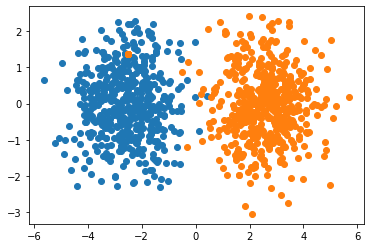

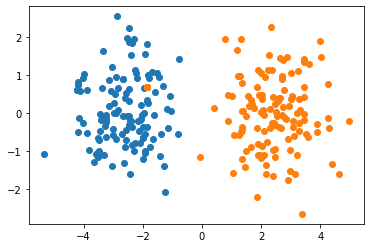

In [24]:
fig, ax = plt.subplots()
ax.scatter(X_train[np.where(Y_train==0),0], X_train[np.where(Y_train==0),1], label='Class 1')
ax.scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1], label='Class 2')

fig1, ax1 = plt.subplots()

ax1.scatter(X_test[np.where(Y_test==0),0], X_test[np.where(Y_test==0),1], label='Class 1')
ax1.scatter(X_test[np.where(Y_test==1),0], X_test[np.where(Y_test==1),1], label='Class 2')

Logistic Regresion 

In [25]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim).double()
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [26]:
criterion = torch.nn.BCELoss()


In [27]:
lr_model = LogisticRegression(X_train.shape[1],1)

In [28]:
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

num_epochs = 20

In [32]:
def accuracy(X, Y_train, model, src):
  output = model(X);
  predicted = output.data > 0.5
  print(src, torch.count_nonzero(torch.eq(predicted, Y_train)),X.size(0))
  return torch.count_nonzero(torch.eq(predicted, Y_train)/X.size(0));

In [34]:
for epoch in range(300):
  optimizer.zero_grad()
  output = lr_model(X_train);
  loss = criterion(output, Y_train)
  loss.backward()
  optimizer.step()
  if(epoch % 20 == 0):
      print(epoch, loss.item())
      accuracy(X_train,Y_train,lr_model, 'train')
      accuracy(X_test,Y_test,lr_model, 'test')

0 0.023889488632299595
train tensor(994) 1000
test tensor(249) 250
20 0.023845361103749643
train tensor(994) 1000
test tensor(249) 250
40 0.023801617854040495
train tensor(994) 1000
test tensor(249) 250
60 0.023758253649848883
train tensor(994) 1000
test tensor(249) 250
80 0.02371526335480564
train tensor(994) 1000
test tensor(249) 250
100 0.023672641927229426
train tensor(994) 1000
test tensor(249) 250
120 0.023630384417924286
train tensor(994) 1000
test tensor(249) 250
140 0.023588485968038902
train tensor(994) 1000
test tensor(249) 250
160 0.023546941806985675
train tensor(994) 1000
test tensor(249) 250
180 0.023505747250417333
train tensor(994) 1000
test tensor(249) 250
200 0.02346489769825969
train tensor(994) 1000
test tensor(249) 250
220 0.023424388632798294
train tensor(994) 1000
test tensor(249) 250
240 0.023384215616817507
train tensor(994) 1000
test tensor(249) 250
260 0.02334437429179026
train tensor(994) 1000
test tensor(249) 250
280 0.02330486037611685
train tensor(994) 1

Output VIZ.

torch.float64


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 1.0, 'Logistic Regression')

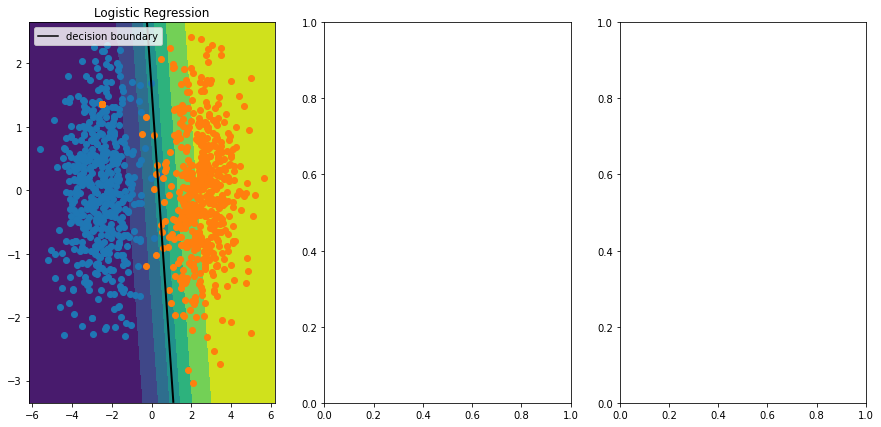

In [ ]:
grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).double()
print(viz_x.dtype)
viz_y = lr_model(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,3, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='black', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='black')
ax[0].scatter(X_train[np.where(Y_train==0),0], X_train[np.where(Y_train==0),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Logistic Regression')

Linear SVM

In [ ]:
Y_train = torch.where(Y_train == 0, -1, 1)
Y_test = torch.where(Y_test == 0, -1, 1)
Y_val = torch.where(Y_val == 0, -1, 1)
print(Y_train.shape, Y_test.shape, Y_val.shape)
X_train = X_train.float()
X_test = X_test.float()
X_val = X_val.float()
print(X_train.shape, X_test.shape, X_val.shape)


torch.Size([1000, 1]) torch.Size([250, 1]) torch.Size([250, 1])
torch.Size([1000, 2]) torch.Size([250, 2]) torch.Size([250, 2])


In [ ]:
def svmloss(labels, outputs):    
  return torch.max(torch.zeros_like(labels), 1-labels*outputs).mean()


In [ ]:
def accuracySVM(X, Y, model, src):
  output = model(X).detach();
  predicted = output.data >= 0
  Y_real = Y >= 0
  print(src, torch.count_nonzero(torch.eq(predicted, Y_real)),X.size(0))

In [ ]:
def linear(X):
  return X;
class Model(torch.nn.Module):
    def __init__(self, X, labels, kernelType, featureDim1 = 1, featureDim2 = 1, gamma = 1, pow = 2):
        super().__init__()
        self.X = X;
        self.labels = labels
        self.kernelType = kernelType

        self.k = None
        if(kernelType == 'linear'):
          self.k = linear
          self.linearLayer = torch.nn.Linear(X.size(1), 1);

    def forward(self, X):
        return self.linearLayer(self.k(X));
        

In [ ]:
#svm_loss_criteria = Hinge_SVM_Loss()
linearModel = Model(X_train, Y_train, 'linear', X_train.size(1), 1)
linearOptim = torch.optim.SGD(linearModel.parameters(), lr=0.1)
accuracySVM(X_train, Y_train, linearModel, 'start')
num_epochs = 1000

start tensor(502) 1000


In [ ]:
for epoch in range(num_epochs):
  linearOptim.zero_grad()
  y_pred_linear = linearModel(X_train)
  loss_linear = svmloss(y_pred_linear, Y_train)
  loss_linear.backward()
  linearOptim.step()
  if(epoch % 20 == 0):
    print(epoch, loss_linear);
    accuracySVM(X_train, Y_train, linearModel, 'train')
    accuracySVM(X_test, Y_test, linearModel, 'test')

0 tensor(1.0281, grad_fn=<MeanBackward0>)
train tensor(757) 1000
test tensor(189) 250
20 tensor(0.0382, grad_fn=<MeanBackward0>)
train tensor(991) 1000
test tensor(249) 250
40 tensor(0.0281, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
60 tensor(0.0252, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
80 tensor(0.0231, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
100 tensor(0.0217, grad_fn=<MeanBackward0>)
train tensor(996) 1000
test tensor(249) 250
120 tensor(0.0207, grad_fn=<MeanBackward0>)
train tensor(996) 1000
test tensor(249) 250
140 tensor(0.0199, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
160 tensor(0.0193, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
180 tensor(0.0187, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
200 tensor(0.0182, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
220 tensor(0.0179, grad_fn=<MeanBackwa

Output VIZ - Linear SVM

torch.float32


Text(0.5, 1.0, 'Linear Kernel')

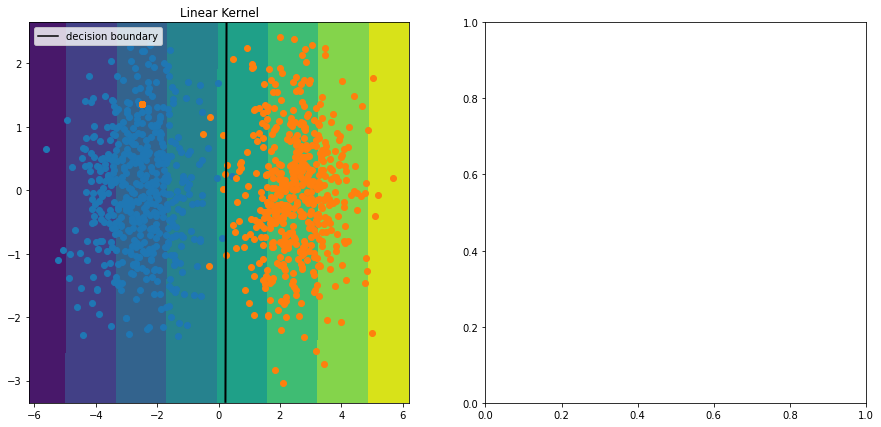

In [ ]:
grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).float()
print(viz_x.dtype)
viz_y = linearModel(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,2, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='black', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='black')
ax[0].scatter(X_train[np.where(Y_train==-1),0], X_train[np.where(Y_train==-1),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Linear Kernel')

Kernal SVM

In [ ]:
Y_train = torch.where(Y_train == 0, -1, 1)
Y_test = torch.where(Y_test == 0, -1, 1)
Y_val = torch.where(Y_val == 0, -1, 1)
print(Y_train.shape, Y_test.shape, Y_val.shape)
X_train = X_train.float()
X_test = X_test.float()
X_val = X_val.float()
print(X_train.shape, X_test.shape, X_val.shape)

torch.Size([1000, 1]) torch.Size([250, 1]) torch.Size([250, 1])
HELP torch.Size([1000, 2]) torch.Size([250, 2]) torch.Size([250, 2])


In [ ]:
class Hinge_SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(Hinge_SVM_Loss,self).__init__()
    def forward(self, outputs, labels):
        labels = torch.unsqueeze(labels,1)
        return torch.max(torch.zeros_like(labels), 1-labels*outputs).mean()

In [ ]:
def rbf(X_train, X, gamma):
  Y = X_train.repeat(X.size(0), 1, 1)
  return torch.exp(- gamma*((X[:,None]-Y)**2).sum(dim=2))

class RBFModel(torch.nn.Module):
    def __init__(self, X, labels, kernelType, featureDim1 = 1, featureDim2 = 1, gamma = 1):
        super().__init__()
        self.X = X;
        self.labels = labels
        self.kernelType = kernelType

        self.k = None
        if(kernelType == 'rbf'):
          self.k = self.X.repeat(self.X.size(0), 1, 1)
          self.gamma = torch.nn.Parameter(torch.FloatTensor([gamma]),
                                                  requires_grad=True)
          self.k = rbf
          self.linearLayer = torch.nn.Linear(self.X.size(0), 1);
 
    def forward(self, X):


        val = self.k(self.X,X, self.gamma)
        return self.linearLayer(val);
        

In [ ]:
svm_loss_criteria = Hinge_SVM_Loss()
rbfModel = RBFModel(X_train, Y_train, 'rbf', X_train.size(1), 1)
rbfOptim = torch.optim.SGD(rbfModel.parameters(), lr=0.1)
accuracySVM(X_train, Y_train, rbfModel, 'start')
num_epochs = 1000

start tensor(502) 1000


In [ ]:
for epoch in range(num_epochs):
  rbfOptim.zero_grad()
  y_pred_rbf = rbfModel(X_train)
  loss_rbf = svmloss(y_pred_rbf, Y_train)
  loss_rbf.backward()
  rbfOptim.step()
  if(epoch % 20 == 0):
    print(epoch, loss_rbf);
    accuracySVM(X_train, Y_train, rbfModel, 'train')
    accuracySVM(X_test, Y_test, rbfModel, 'test')

0 tensor(0.9937, grad_fn=<MeanBackward0>)
train tensor(985) 1000
test tensor(248) 250
20 tensor(0.0380, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
40 tensor(0.0229, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(249) 250
60 tensor(0.0178, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(249) 250
80 tensor(0.0157, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(249) 250
100 tensor(0.0145, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
120 tensor(0.0140, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
140 tensor(0.0136, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
160 tensor(0.0135, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
180 tensor(0.0134, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
200 tensor(0.0132, grad_fn=<MeanBackward0>)
train tensor(993) 1000
test tensor(250) 250
220 tensor(0.0132, grad_fn=<MeanBackwa

torch.float32


Text(0.5, 1.0, 'Linear Kernel')

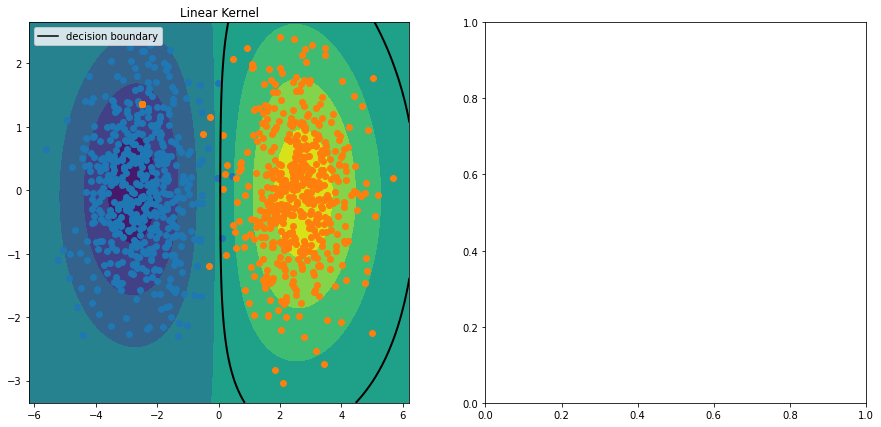

In [ ]:
grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).float()
print(viz_x.dtype)
viz_y = rbfModel(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,2, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='black', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='black')
ax[0].scatter(X_train[np.where(Y_train==-1),0], X_train[np.where(Y_train==-1),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Linear Kernel')

SVM - POLY

In [ ]:
from scipy.special import comb

Y_train = torch.where(Y_train == 0, -1, 1)
Y_test = torch.where(Y_test == 0, -1, 1)
Y_val = torch.where(Y_val == 0, -1, 1)
print(Y_train.shape, Y_test.shape, Y_val.shape)
X_train = X_train.float()
X_test = X_test.float()
X_val = X_val.float()
print(X_train.shape, X_test.shape, X_val.shape)


torch.Size([1000, 1]) torch.Size([250, 1]) torch.Size([250, 1])
torch.Size([1000, 2]) torch.Size([250, 2]) torch.Size([250, 2])


In [ ]:
def poly(X_train, X, num):
  return torch.pow((X @ (X_train.t()) + 1) ,num)

class PolyModel(torch.nn.Module):
    def __init__(self, X, labels, kernelType, num = 1):
        super().__init__()
        self.X = X;
        self.labels = labels
        self.kernelType = kernelType

        self.k = None
        if(kernelType == 'poly'):
          self.k = poly
          self.num = num
          self.linearLayer = torch.nn.Linear(X.size(0), 1);
 
    def forward(self, X):
        val = self.k(self.X, X, self.num)
        return self.linearLayer(val);
        

In [ ]:
svm_loss_criteria = Hinge_SVM_Loss()
polyModel = PolyModel(X_train, Y_train, 'poly', 2)
polyOptim = torch.optim.SGD(polyModel.parameters(), lr=0.1)
accuracySVM(X_train, Y_train, polyModel, 'start')
num_epochs = 1000

start tensor(15) 1000


In [ ]:
for epoch in range(num_epochs):
  polyOptim.zero_grad()
  y_pred_poly = polyModel(X_train)
  loss_poly = svmloss(y_pred_poly, Y_train)
  loss_poly.backward()
  polyOptim.step()
  if(epoch % 20 == 0):
    print(epoch, loss_poly);
    accuracySVM(X_train, Y_train, polyModel, 'train')
    accuracySVM(X_test, Y_test, polyModel, 'test')

0 tensor(6.2692, grad_fn=<MeanBackward0>)
train tensor(986) 1000
test tensor(248) 250
20 tensor(12.1180, grad_fn=<MeanBackward0>)
train tensor(995) 1000
test tensor(249) 250
40 tensor(11.9373, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
60 tensor(11.7661, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
80 tensor(11.5949, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
100 tensor(11.4237, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
120 tensor(11.2525, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
140 tensor(11.0813, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
160 tensor(10.9102, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
180 tensor(10.7390, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
200 tensor(10.5678, grad_fn=<MeanBackward0>)
train tensor(994) 1000
test tensor(249) 250
220 tensor(10.3966, grad_fn=

torch.float32


Text(0.5, 1.0, 'Poly Kernel')

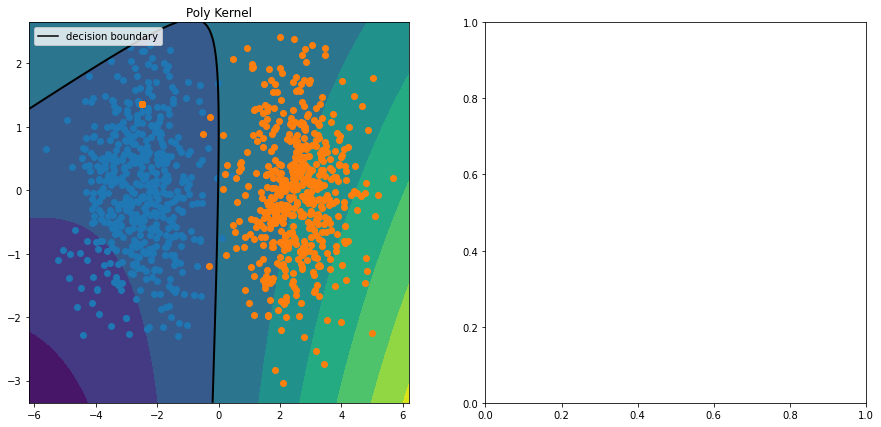

In [ ]:
grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).float()
print(viz_x.dtype)
viz_y = polyModel(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,2, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='black', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='black')
ax[0].scatter(X_train[np.where(Y_train==-1),0], X_train[np.where(Y_train==-1),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Poly Kernel')

Logistic Regression With Kernels

In [ ]:
X_train = X_train.float()
X_test = X_test.float()
X_val = X_val.float()

Y_train = Y_train.float()
Y_test = Y_test.float()
Y_val = Y_val.float()


In [ ]:
class LogisticRegressionKernel(torch.nn.Module):
    def __init__(self, X, labels, kernalType ='linear', gamma = 1.0, c = 1.0, num = 2 ):
        super(LogisticRegressionKernel, self).__init__()
        self.X = X;
        self.labels = labels;
        self.kernalType = kernalType
        if(self.kernalType == 'linear'):
          self.k = linear;
          self.linearLayer = torch.nn.Linear(self.X.size(1), 1).float()

        if(self.kernalType == 'rbf'):
          self.k = rbf;
          self.gamma = torch.nn.Parameter(torch.FloatTensor([gamma]),
                                                  requires_grad=True)
          self.linearLayer = torch.nn.Linear(self.X.size(0), 1).float()

        if(self.kernalType == 'poly'):
          self.k = poly;
          self.num = num
          self.linearLayer = torch.nn.Linear(self.X.size(0), 1).float()
        
    def forward(self, x):
      if(self.kernalType == 'linear'):
        return torch.sigmoid(self.linearLayer(self.k(x)))
      if(self.kernalType == 'rbf'):
        return torch.sigmoid(self.linearLayer(self.k(self.X,x,self.gamma)))
      if(self.kernalType == 'poly'):
        return torch.sigmoid(self.linearLayer(self.k(self.X,x,self.num)))

In [ ]:
lrk = LogisticRegressionKernel(X_train, Y_train, 'linear', 1,1,3)
lrkOptim = torch.optim.SGD(lrk.parameters(), lr=0.1)
accuracy(X_train, Y_train, lrk, 'start')
criterion = torch.nn.BCELoss()
num_epochs = 1000

start tensor(502) 1000


In [ ]:
for epoch in range(300):
  lrkOptim.zero_grad()
  output = lrk(X_train);
  loss = criterion(output, Y_train)
  loss.backward()
  lrkOptim.step()
  if(epoch % 20 == 0):
      print(epoch, loss.item())
      accuracy(X_train,Y_train,lrk, 'train')
      accuracy(X_test,Y_test,lrk, 'test')

0 0.7599887847900391
train tensor(628) 1000
test tensor(149) 250
20 0.12746888399124146
train tensor(987) 1000
test tensor(249) 250
40 0.07955851405858994
train tensor(991) 1000
test tensor(249) 250
60 0.06142390891909599
train tensor(994) 1000
test tensor(249) 250
80 0.051655806601047516
train tensor(994) 1000
test tensor(249) 250
100 0.04546361789107323
train tensor(994) 1000
test tensor(249) 250
120 0.04114817455410957
train tensor(994) 1000
test tensor(249) 250
140 0.03794790059328079
train tensor(996) 1000
test tensor(249) 250
160 0.035468075424432755
train tensor(996) 1000
test tensor(249) 250
180 0.03348267078399658
train tensor(996) 1000
test tensor(249) 250
200 0.03185240924358368
train tensor(996) 1000
test tensor(249) 250
220 0.03048655018210411
train tensor(996) 1000
test tensor(249) 250
240 0.029323307797312737
train tensor(996) 1000
test tensor(249) 250
260 0.02831903100013733
train tensor(995) 1000
test tensor(249) 250
280 0.027441993355751038
train tensor(995) 1000
test

torch.float32


Text(0.5, 1.0, 'Logistic Regression RBF Kernel')

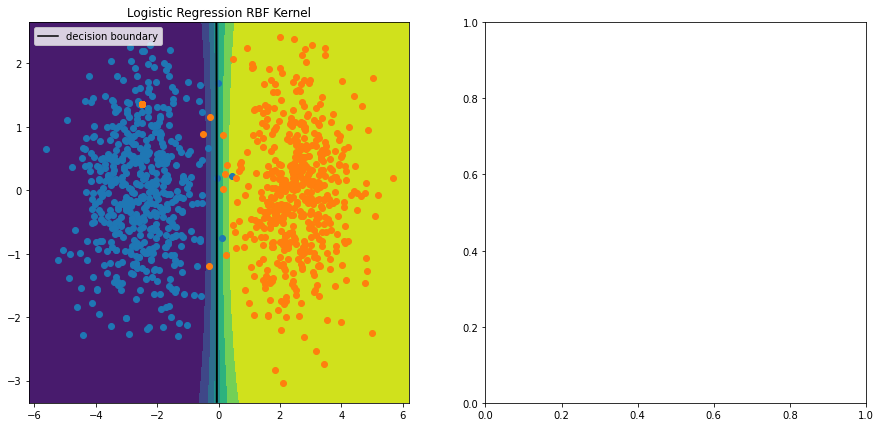

In [ ]:
grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).float()
print(viz_x.dtype)
viz_y = lrk(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,2, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='black', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='black')
ax[0].scatter(X_train[np.where(Y_train==0),0], X_train[np.where(Y_train==0),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Logistic Regression RBF Kernel')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
for n_neighbors in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
  knn.fit(X_train,Y_train)
  preds = knn.predict(X_train)
  predTest = preds >= 0.5
  print('Train', n_neighbors , accuracy_score(Y_train, predTest))
  preds2 = knn.predict(X_test)
  predTest = preds2 >= 0.5
  print('Test', n_neighbors, accuracy_score(Y_test, predTest))
  preds3 = knn.predict(X_val)
  predTest = preds3 >= 0.5
  print('Val', n_neighbors, accuracy_score(Y_val, predTest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Train 1 1.0
Test 1 0.996
Val 1 0.98
Train 2 1.0
Test 2 0.996
Val 2 0.98
Train 3 1.0
Test 3 1.0
Val 3 0.996
Train 4 1.0
Test 4 1.0
Val 4 0.996
Train 5 1.0
Test 5 1.0
Val 5 0.996
Train 6 1.0
Test 6 1.0
Val 6 0.996
Train 7 1.0
Test 7 1.0
Val 7 0.996
Train 8 1.0
Test 8 1.0
Val 8 0.996
Train 9 1.0
Test 9 1.0
Val 9 0.996
Train 10 1.0
Test 10 1.0
Val 10 0.996
Train 11 1.0
Test 11 1.0
Val 11 0.996
Train 12 1.0
Test 12 1.0
Val 12 0.996
Train 13 1.0
Test 13 1.0
Val 13 0.996
Train 14 1.0
Test 14 1.0
Val 14 0.996
Train 15 1.0
Test 15 1.0
Val 15 0.996
Train 16 1.0
Test 16 1.0
Val 16 0.996
Train 17 1.0
Test 17 1.0
Val 17 0.996
Train 18 1.0
Test 18 1.0
Val 18 0.996
Train 19 1.0
Test 19 1.0
Val 19 0.996
Train 20 1.0
Test 20 1.0
Val 20 0.996


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(-4.046143054799927, 3.3538569452000795)

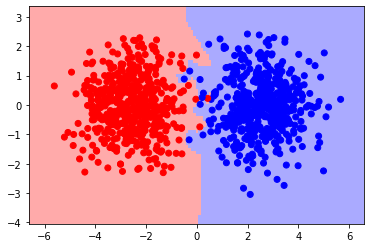

In [ ]:
##CODE referred from 561
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train,Y_train)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      #Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_bayes_model = GaussianNB()


In [ ]:
#Using GaussianNB() as the dataset is dervied from gauss distribution
#without hyperparameter tuning
naive_bayes_model.fit(X_train, Y_train)
print("score" ,naive_bayes_model.score(X_test, Y_test))

#No need tune this , as fitting on training itself gave the highes accuracy
#params = {'var_smoothing': np.logspace(0,-9, num=100)}

# htuning = GridSearchCV(estimator=naive_bayes_model, 
#                  param_grid=params, 
#                  cv=10, 
#                  scoring='accuracy') 
# htuning.fit(X_train, Y_train)
# print(htuning.score(X_test, Y_test))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
nbm = naive_bayes_model
nbm.fit(X_train,Y_train)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = nbm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=Y,s=10)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xx[0]+0.1,xx[1]-0.1)
ax.set_ylim(yy[0]+0.1,yy[1]-0.1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()
      #Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

Naive Bayes over the given Range 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

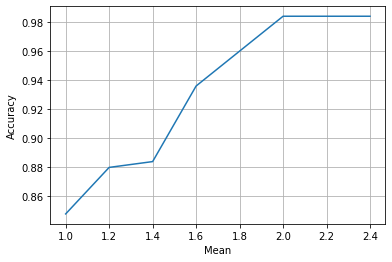

In [20]:
from sklearn.utils import shuffle

values=[1,1.2,1.4,1.6,1.8,2.0,2.2,2.4]
testAccuracy = []
for i in range(len(values)):
  positive_distribution = np.random.multivariate_normal([values[i],0], np.identity(2), size=750)
  ones = torch.ones([750,1]);
  negative_distribution = np.random.multivariate_normal([-values[i],0], np.identity(2), size = 750)
  zeros = torch.zeros([750,1]);
  X = np.append(positive_distribution, negative_distribution, 0)
  Y = np.append(ones, zeros, 0)

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=(1-5/6), random_state=73)
  naive_bayes_model = GaussianNB()

  naive_bayes_model.fit(X_train, Y_train)
  testAccuracy.append(naive_bayes_model.score(X_test, Y_test))


plt.plot(values, testAccuracy)
plt.xlabel("Mean")
plt.ylabel("Accuracy")
plt.grid()
plt.show()  


KNN over mulitple Mean values

(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)
(1000, 2) (250, 2) (250, 2) (1000, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

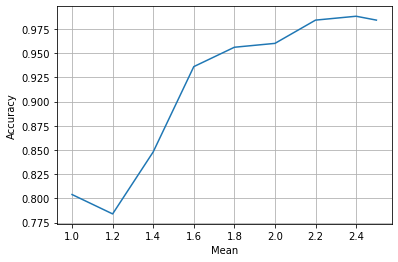

In [19]:
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

values=[1,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.5]
testAccuracy = []
for i in range(len(values)):
  positive_distribution = np.random.multivariate_normal([values[i],0], np.identity(2), size=750)
  ones = torch.ones([750,1]);
  negative_distribution = np.random.multivariate_normal([-values[i],0], np.identity(2), size = 750)
  zeros = torch.zeros([750,1]);
  X = np.append(positive_distribution, negative_distribution, 0)
  Y = np.append(ones, zeros, 0)

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=(1-5/6), random_state=73)

  X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=(1-4/5), random_state=73)

  print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape)
  X_train, Y_train = shuffle(X_train,Y_train,random_state=1)
  X_test, Y_test = shuffle(X_test,Y_test,random_state=1)

  knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
  knn.fit(X_train,Y_train)
  preds = knn.predict(X_test)
  predTest = preds >= 0.5
  testAccuracy.append(accuracy_score(Y_test, predTest))

plt.plot(values, testAccuracy)
plt.xlabel("Mean")
plt.ylabel("Accuracy")
plt.grid()
plt.show()  
